# Notebook Structure

1. Import necessary dependencies
2. Import the required dataset
3. Visualize different columns using Lollipop plot
4. How to interpret Donut plot



# 1. Import necessary dependencies

In [94]:
# libraries & dataset
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# 2. Import the required dataset

In [95]:
# Load the titanic dataset
df = sns.load_dataset('titanic')

In [96]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 3. Visualize different columns

### A. Drawing a simple lollipop chart with default parameters

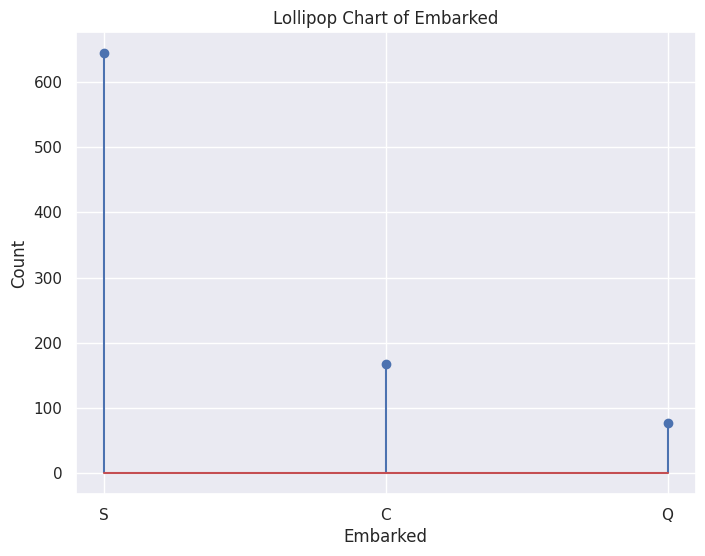

In [118]:
# Get the value counts of the 'embarked' column
embarked_counts = df['embarked'].value_counts()

# Create the lollipop chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.stem(embarked_counts.index, embarked_counts.values)

# Add title and labels
plt.title('Lollipop Chart of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')

# Show the plot
plt.show()

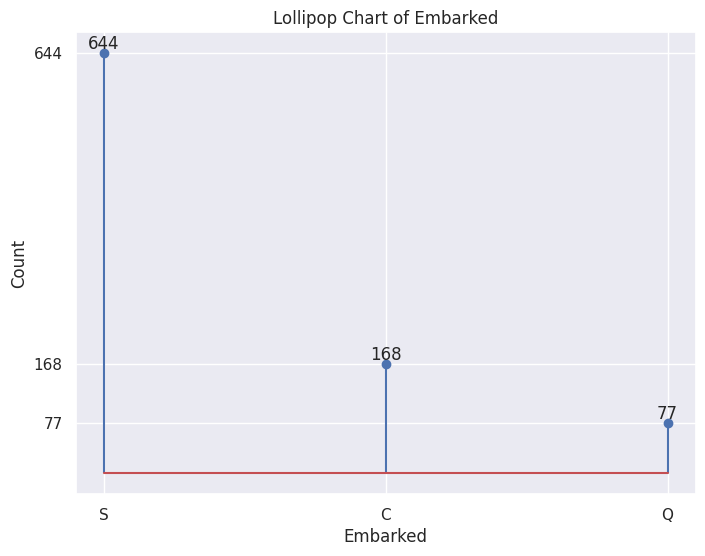

In [119]:
# Get the value counts of the 'embarked' column
embarked_counts = df['embarked'].value_counts()

# Create the lollipop chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.stem(embarked_counts.index, embarked_counts.values)

# Add title and labels
plt.title('Lollipop Chart of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')

# Add labels to the x-axis and y-axis.
plt.xticks(embarked_counts.index)  # Ensure all categories are labeled
plt.yticks(embarked_counts.values) # Ensure all counts are labeled

# Add annotations to the points
for x, y in zip(embarked_counts.index, embarked_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Show the plot
plt.show()

### B. Visualize multiple lollipop plots

1. Update the columns that you want to visualize
2. Update the colors of the bar
3. Update the num_cols
4. update the figsize



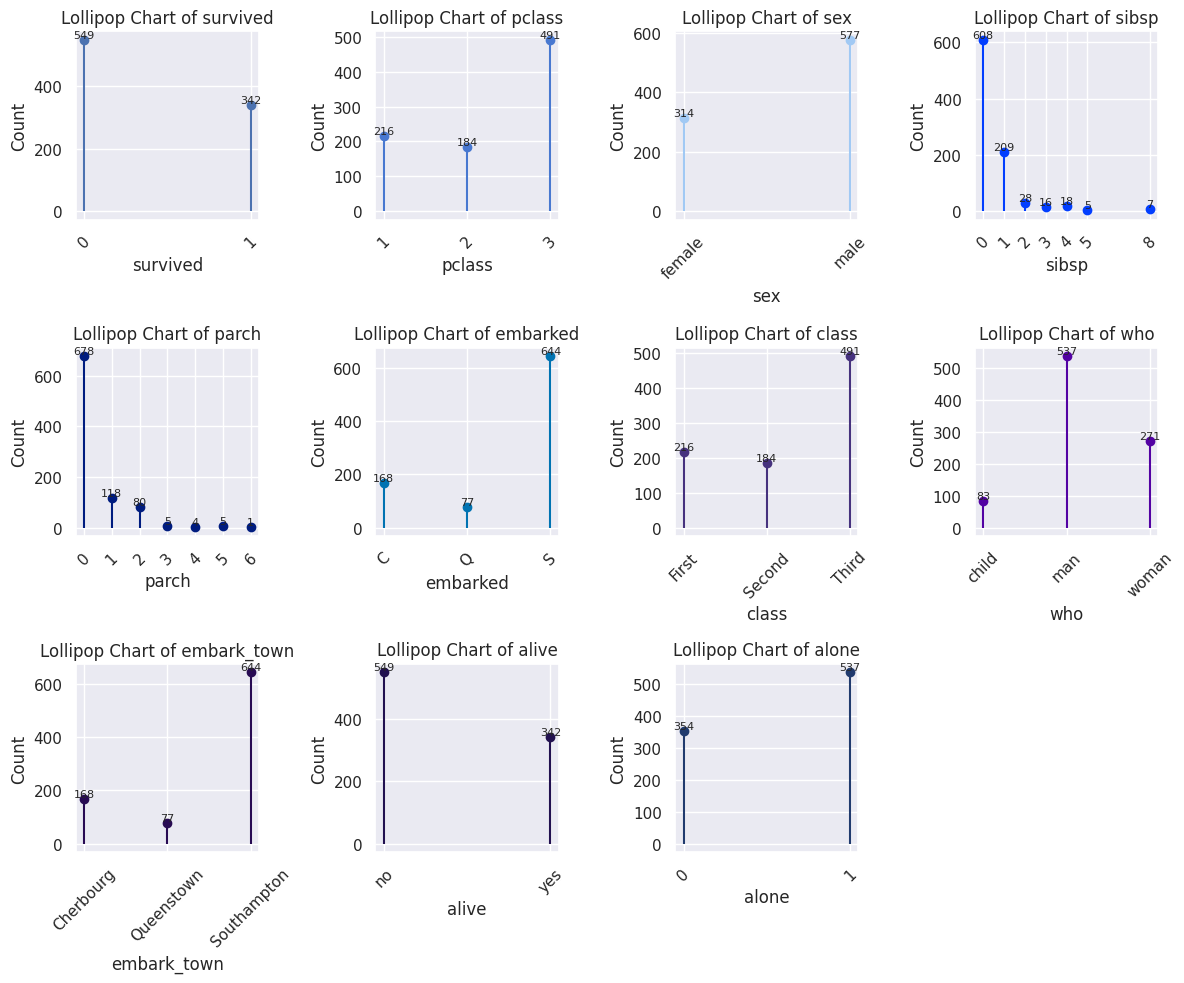

In [128]:
# Define the columns to plot
columns_to_plot = ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'embark_town', 'alive', 'alone']

# Define a list of color palettes.
color_palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind','viridis', 'plasma', 'inferno', 'magma', 'cividis']

# Determine the number of rows and columns for the subplot grid
num_cols = 4
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()

# Iterate through the columns and plot each one in a separate subplot
for i, col in enumerate(columns_to_plot):
    # Select the appropriate subplot axis
    ax = axes[i]

    # Get the value counts for the current column
    data = df[col].value_counts().sort_index()  # Get counts and sort by index

    # Use a different color palette for each lollipop chart
    # Get a color from the current palette using seaborn's color_palette function
    # and select the first color from the palette
    color = sns.color_palette(color_palettes[i % len(color_palettes)])[0]

    # Create the lollipop chart
    ax.stem(data.index, data.values, linefmt=color, markerfmt=color, basefmt=" ")  # Use stem for lollipop

    # Add title and labels
    ax.set_title(f'Lollipop Chart of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_xticks(data.index)  # Ensure x-axis labels are the categories
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

    # Add annotations (optional)
    for x, y in zip(data.index, data.values):
        ax.text(x, y, str(y), ha='center', va='bottom', fontsize=8)

# Remove any unused subplots
if len(columns_to_plot) < num_rows * num_cols:
    for j in range(len(columns_to_plot), num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping titles/labels
plt.tight_layout()

# Show the plots
plt.show()

# 4. How to Interpret Lollipop chart :

How to Interpret a Lollipop Chart

* Identify Categories: Look at the x-axis to understand the categories being compared.

Compare Values:

* The length of the stem makes it easy to compare values across categories. Longer stems indicate larger values, while shorter stems indicate smaller values.
* The y-axis scale shows the range of values.

Look for Patterns:

* Ranking: Lollipop charts are excellent for ranking categories. You can quickly see which categories have the highest and lowest values.
* Outliers: Data points that are far from the others are easily noticeable.
* Clusters: See if data points tend to cluster in certain value ranges.

Consider the Context:

* The meaning of the data depends on what is being measured.  For example, if it represents sales figures, you can see which products sold the most.


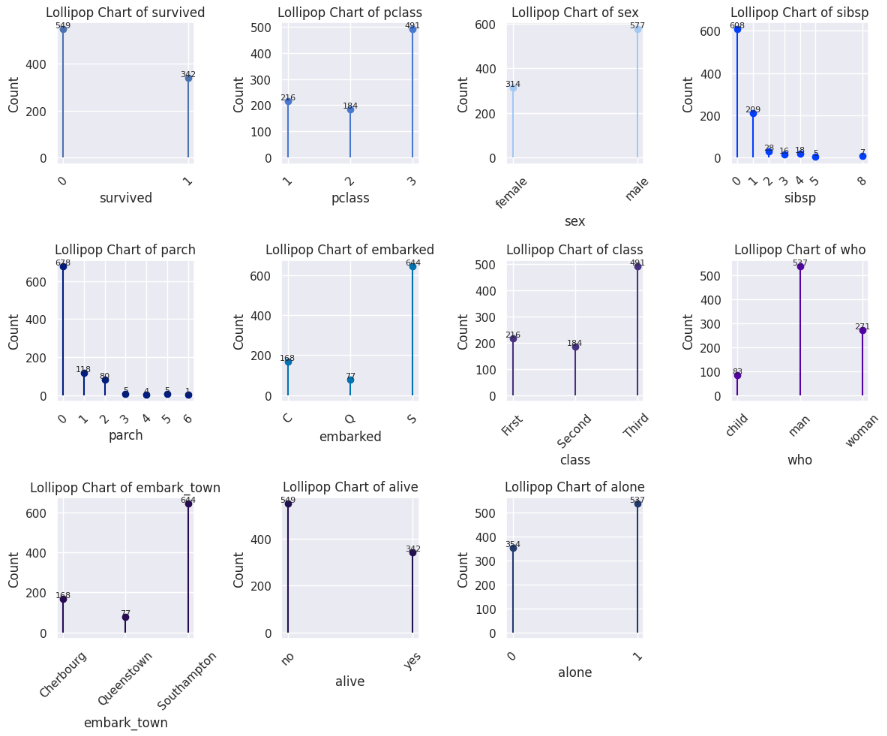

Individual Chart Analysis

Lollipop Chart of Survived:

* Categories: Survived (0 and 1, presumably representing No and Yes).
* Values: The count of each survival category.
* Patterns: A large number of individuals did not survive, a smaller number did.

Lollipop Chart of Pclass:

* Categories: Passenger class (1, 2, and 3).
* Values: The count of passengers in each class.
* Patterns: Most passengers were in third class, followed by first class, and then second class.

Lollipop Chart of Sex:

* Categories: male, female
* Values: The count of each sex.
* Patterns: There are more males than females.

Lollipop Chart of Sibsp:

* Categories: Number of siblings/spouses aboard (ranging from 0 to 8).
* Values: The count of passengers with that many siblings/spouses.
* Patterns: Most passengers had no siblings or spouses.

Lollipop Chart of Parch:

* Categories: Number of parents/children aboard.
* Values: The count of passengers with that many parents/children.
* Patterns: Most passengers had no parents or children aboard.

Lollipop Chart of Embarked:

* Categories: The places from which the passengers embarked (C, Q, and S).
* Values: The count of passengers from each embarkation point.
* Patterns: Most passengers embarked from Southampton (S).

Lollipop Chart of Class:

* Categories: Class of ticket (First, Second, Third).
* Values: The count of each ticket class.
* Patterns: Most passengers were in the Third Class.

Lollipop Chart of Who:

* Categories: Gender and age category (child, man, woman).
* Values: The count of passengers in each category.
* Patterns: Most passengers were men, followed by women, and then children.

Lollipop Chart of embark_town:

* Categories: The embarkation towns.
* Values: The count of passengers from each town.
* Patterns: Most passengers embarked from Southampton.

Lollipop Chart of alive:

* Categories: Whether the passengers survived or not.
* Values: The count of survivors and non-survivors.
* Patterns: Most passengers did not survive.

Lollipop Chart of alone:

* Categories: Whether the passenger was alone.
* Values: The count of passengers who were alone and not alone.
* Patterns: Majority of the passengers were not alone.